In [3]:
import copy
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import torch
from torch import nn
from torch import optim
from sklearn.preprocessing import MinMaxScaler
# from pylab import mpl
# mpl.rcParams['font.sans-serif'] = ['SimHei']

### 获取原始数据

In [4]:
data = pd.read_csv('../数据集/gfdf_with_cloud.csv')
data

,Unnamed: 0,time,value,weather_status,temperature,humidity,wind_speed,wind_level,wind_direction_angle,wind_direction,pressure,visibility,precipitation,light
0,0,2021/1/1 0:00,3210.842464,1,'-8.6','41','0.5','0','359','鍖楅','977','9.7','0','0'
1,1,2021/1/1 0:15,3104.507008,1,'-8.88','43.00','0.5','0','359','鍖楅','977','9.7','0','0'
2,2,2021/1/1 0:30,3037.705984,1,'-9.16','45.00','0.5','0','359','鍖楅','977','9.7','0','0'
3,3,2021/1/1 0:45,2960.176288,1,'-9.44','47.00','0.5','0','359','鍖楅','977','9.7','0','0'
4,4,2021/1/1 1:00,2889.226528,3,'-9.7','49','0.7','0','335','瑗垮寳椋?,'976','8.6','0','0'
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75547,75547,2023/2/26 22:45,5649.941920,1,'5.85','64.75','1.6','17','250','瑗块','976','5.2','0','0'
75548,75548,2023/2/26 23:00,5451.523744,1,'5.5','66','1','0','124','涓滃崡椋?,'976','4.6','0','0'
75549,75549,2023/2/26 23:15,5246.500000,1,'5.15','67.25','1','0','124','涓滃崡椋?,'976','4.6','0','0'
75550,75550,2023/2/26 23:30,5039.924704,1,'4.80','68.50','1','0','124','涓滃崡椋?,'976','4.6','0','0'


### 观察数据

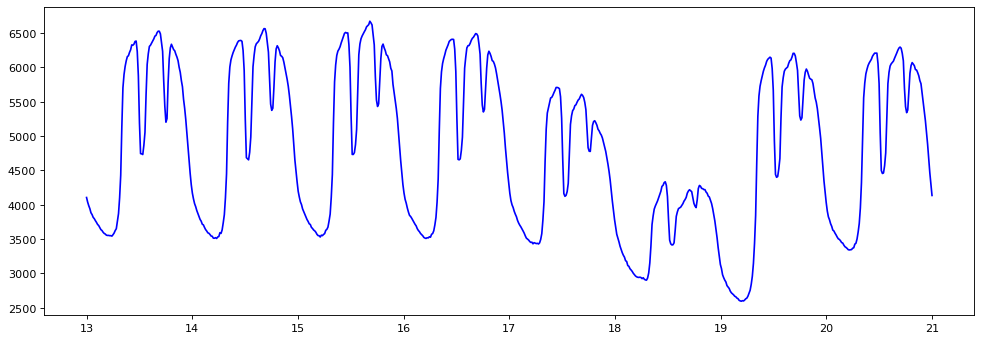

In [5]:
# 2021年正月13到2021年正月20负荷的分布
plt.figure(figsize=(15, 5), dpi=80)

X = np.linspace(13, 21, 768, endpoint=True)
C = np.array(data['value'])[5184:5952]
plt.plot(X, C, color='blue', label='预测')
plt.show()

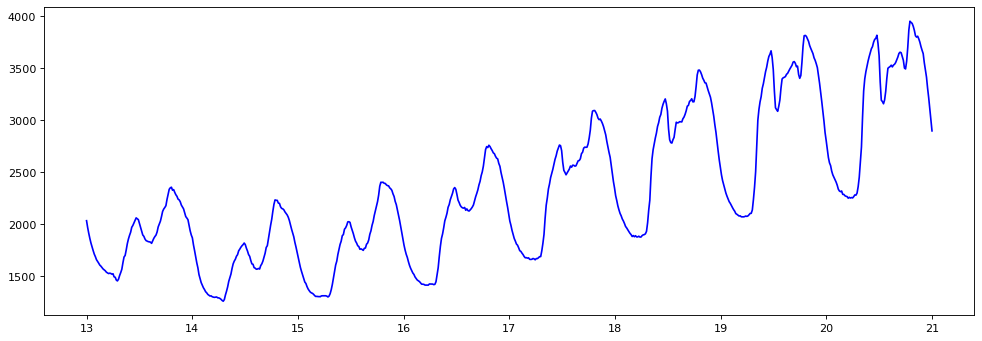

In [6]:
# 2022年正月13到2022年正月20负荷的分布
plt.figure(figsize=(15, 5), dpi=80)

X = np.linspace(13, 21, 768, endpoint=True)
C = np.array(data['value'])[39168:39936]
plt.plot(X, C, color='blue', label='预测')
plt.show()

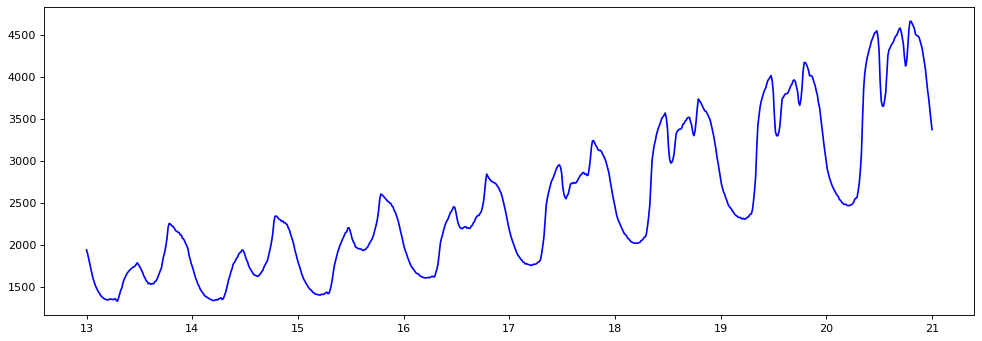

In [7]:
# 2023年正月13到2023年正月20负荷的分布
plt.figure(figsize=(15, 5), dpi=80)

X = np.linspace(13, 21, 768, endpoint=True)
C = np.array(data['value'])[73248:73248+768]
plt.plot(X, C, color='blue', label='预测')
plt.show()

在元宵节负荷基本没有什么变化，并且元宵节不是法定节假日，所以在这个数据集里不将元宵节作为节假日处理，这里holiday为1的都是国家法定节假日。

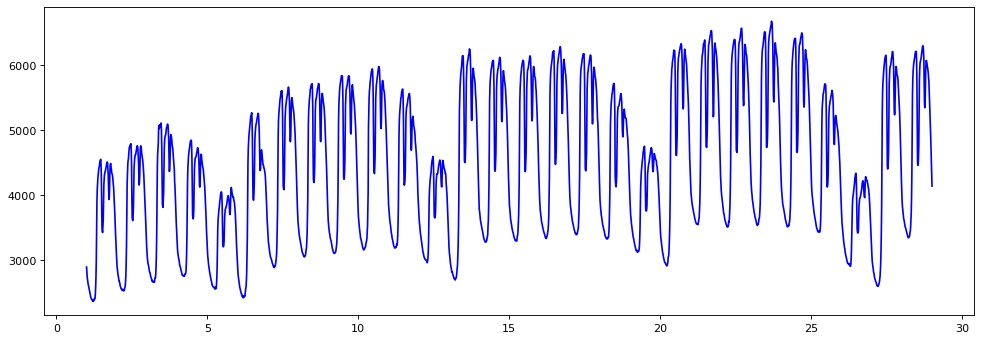

In [8]:
# 农历2020年腊月23到2021年正月20负荷的分布
plt.figure(figsize=(15, 5), dpi=80)

X = np.linspace(1, 29, 2688, endpoint=True)
C = np.array(data['value'])[3264:5952]
plt.plot(X, C, color='blue', label='预测')
plt.show()

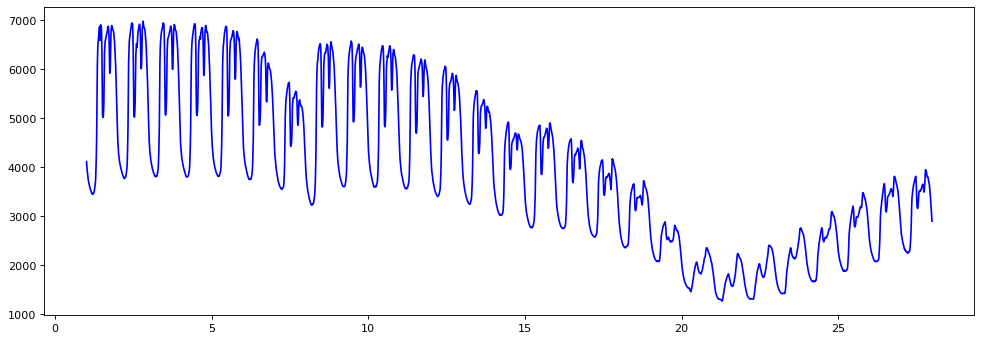

In [9]:
# 农历2021年腊月23到2022年正月20负荷的分布
plt.figure(figsize=(15, 5), dpi=80)

X = np.linspace(1, 28, 2592, endpoint=True)
C = np.array(data['value'])[37344:39936]
plt.plot(X, C, color='blue', label='预测')
plt.show()

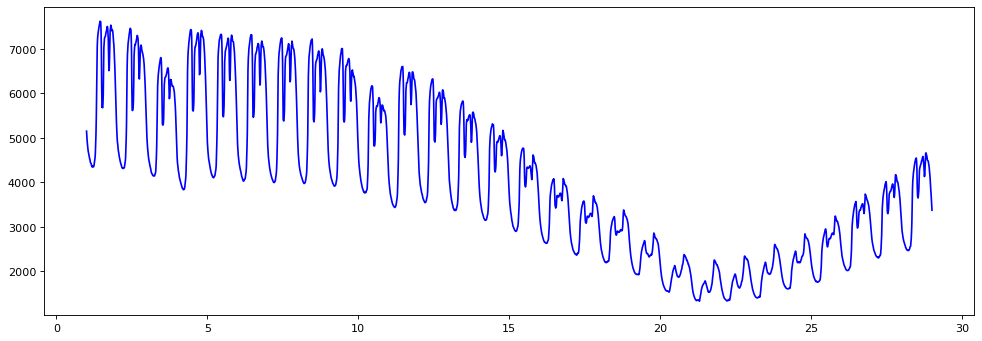

In [10]:
# 农历2022年腊月23到2023年正月20负荷的分布
plt.figure(figsize=(15, 5), dpi=80)

X = np.linspace(1, 29, 2688, endpoint=True)
C = np.array(data['value'])[71328:73248+768]
plt.plot(X, C, color='blue', label='预测')
plt.show()

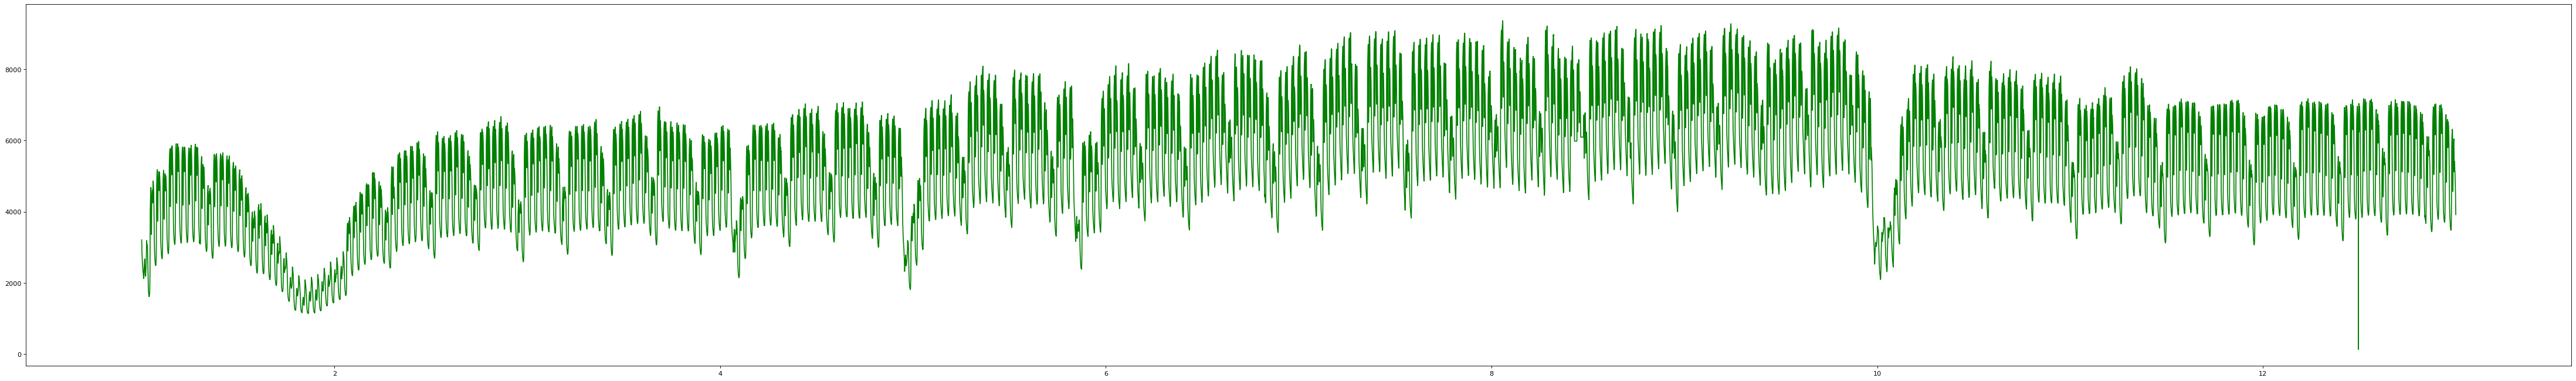

In [11]:
#  2021年全年电力负荷的分布
plt.figure(figsize=(70, 10), dpi=80)

X = np.linspace(1, 13, 35040, endpoint=True)
C = np.array(data['value'])[:35040]
plt.plot(X, C, color='green')
plt.show()

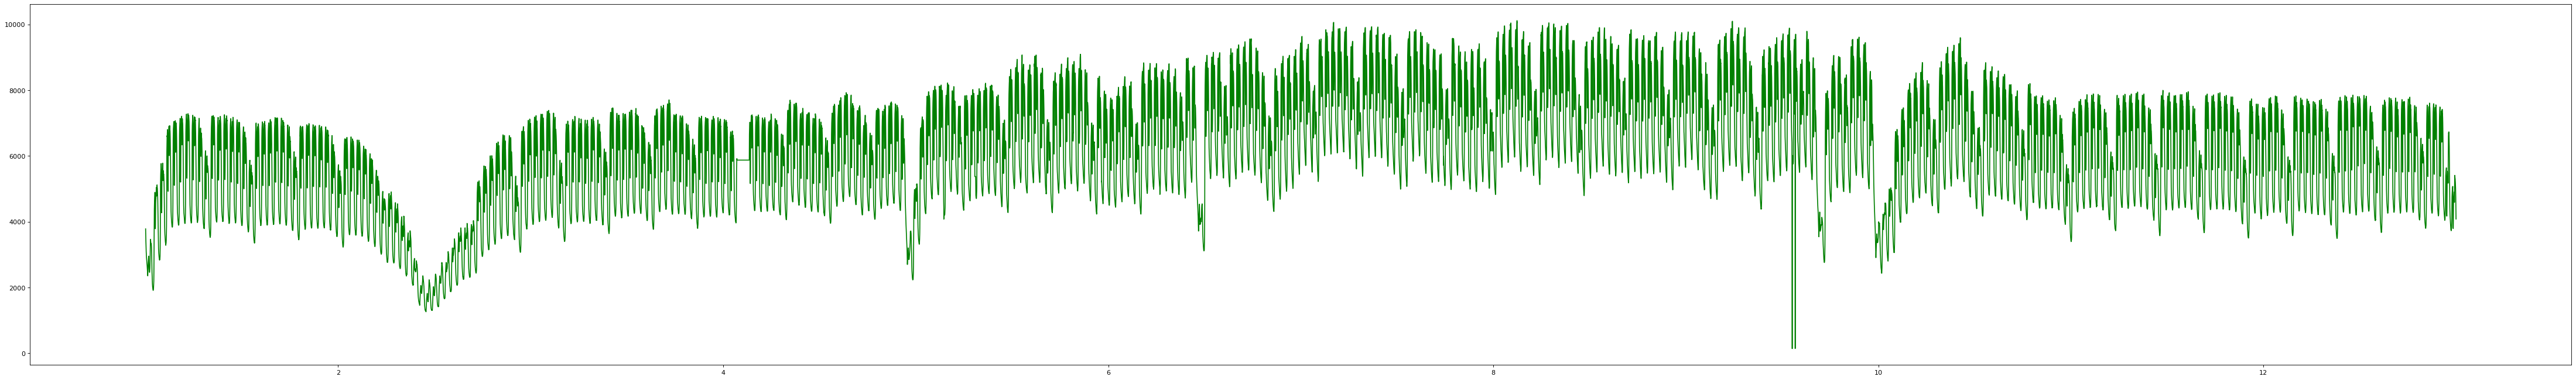

In [12]:
#  2022年全年电力负荷的分布
plt.figure(figsize=(70, 10), dpi=80)

X = np.linspace(1, 13, 35040, endpoint=True)
C = np.array(data['value'])[35040: 70080]
plt.plot(X, C, color='green')
plt.show()

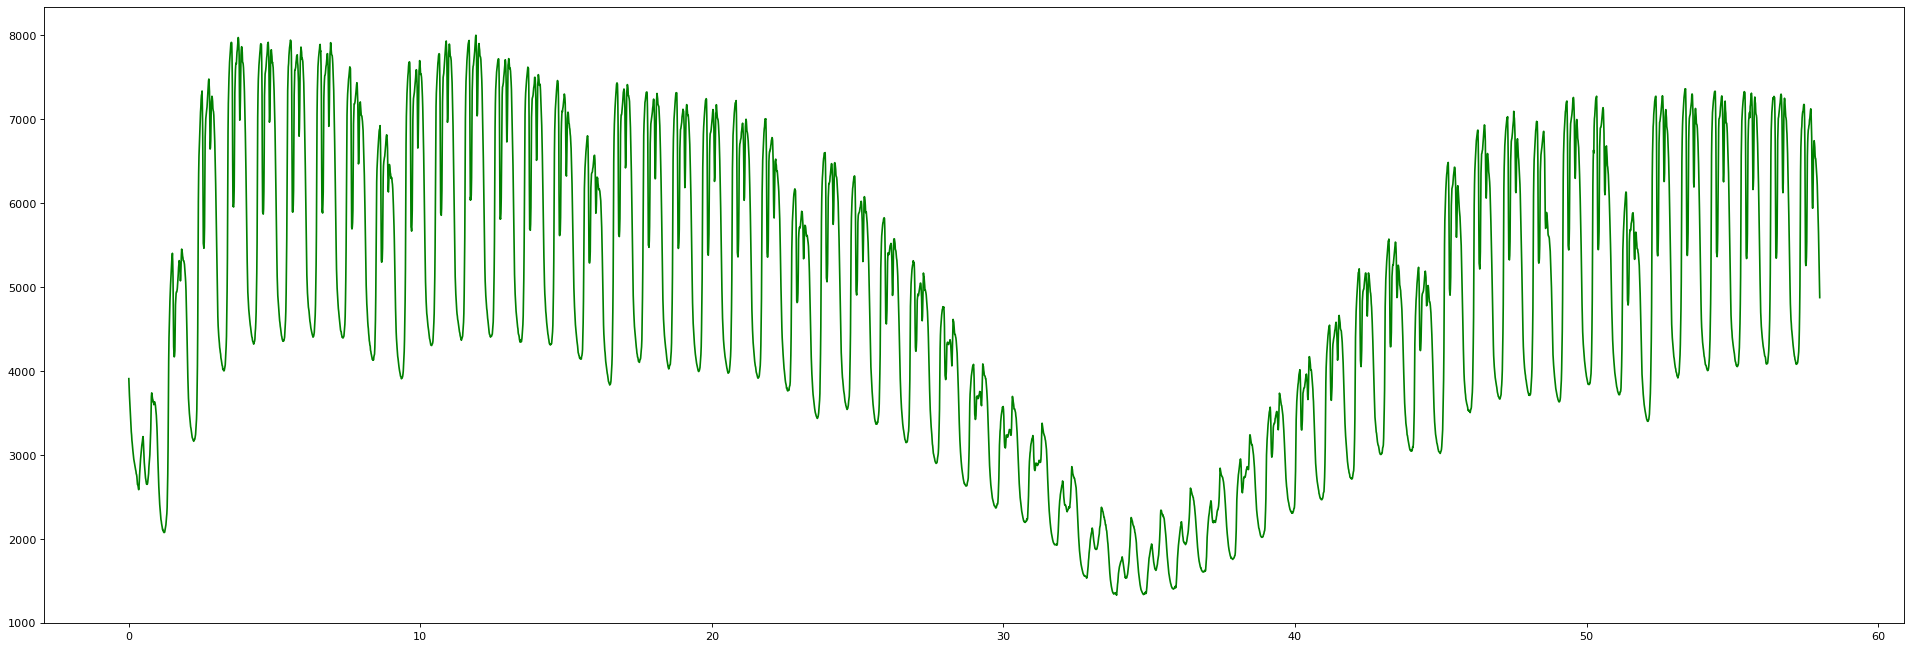

In [13]:
#  2023年前57天电力负荷的分布
plt.figure(figsize=(30, 10), dpi=80)

X = np.linspace(0, 58, 5472, endpoint=True)
C = np.array(data['value'])[70080:]
plt.plot(X, C, color='green')
plt.show()

随着年份的增加，电力负荷整体上呈上升趋势，并且年初电力负荷都经历了一次较大的下降，不知道是什么原因。

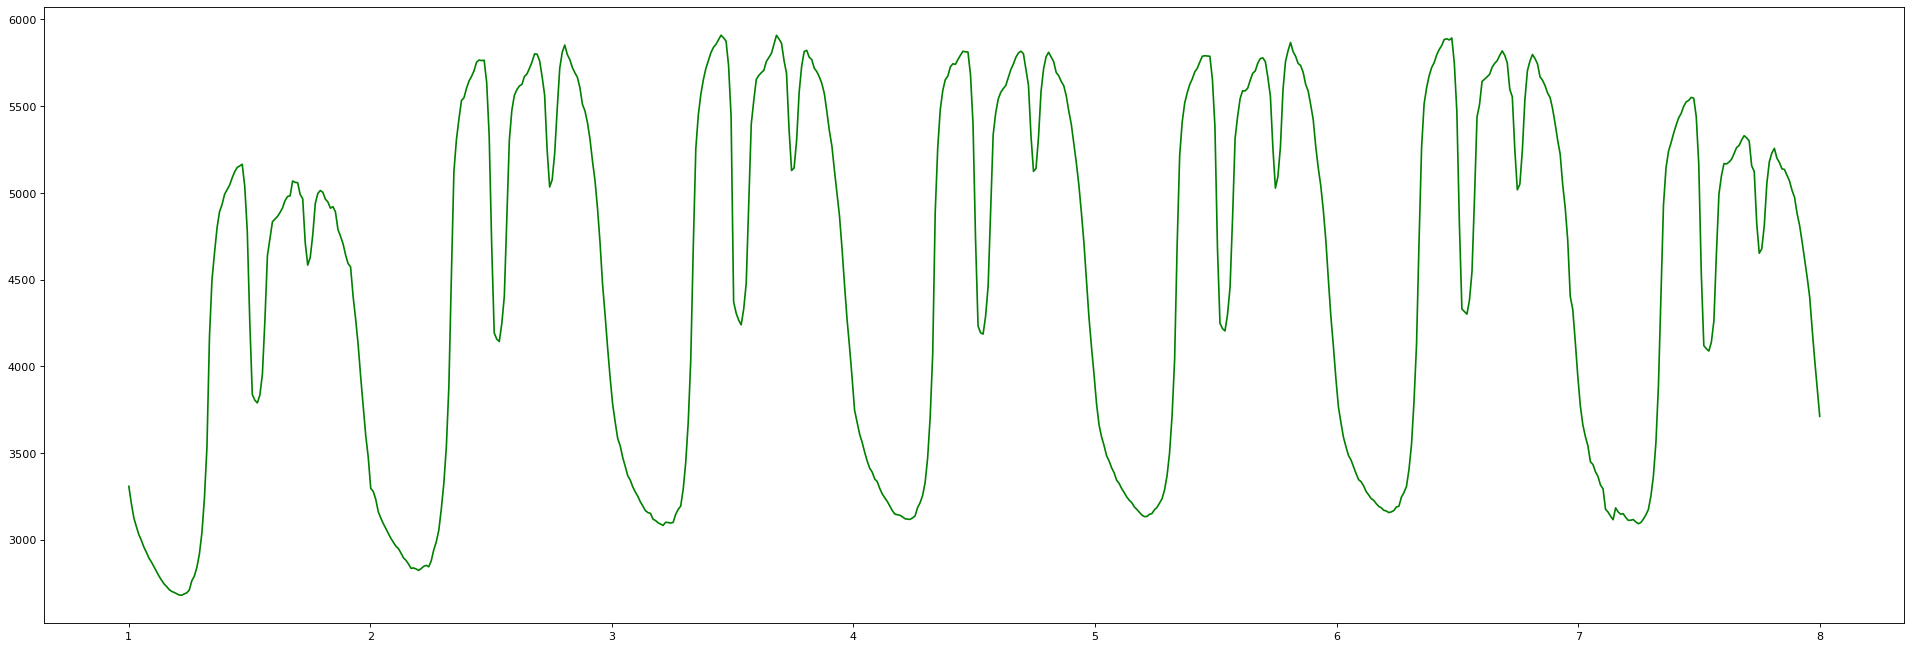

In [14]:
#  2021年1-4到1-10电力负荷的分布（周一到周日）
plt.figure(figsize=(30, 10), dpi=80)

X = np.linspace(1, 8, 672, endpoint=True)
C = np.array(data['value'][288: 960])
plt.plot(X, C, color='green')
plt.show()

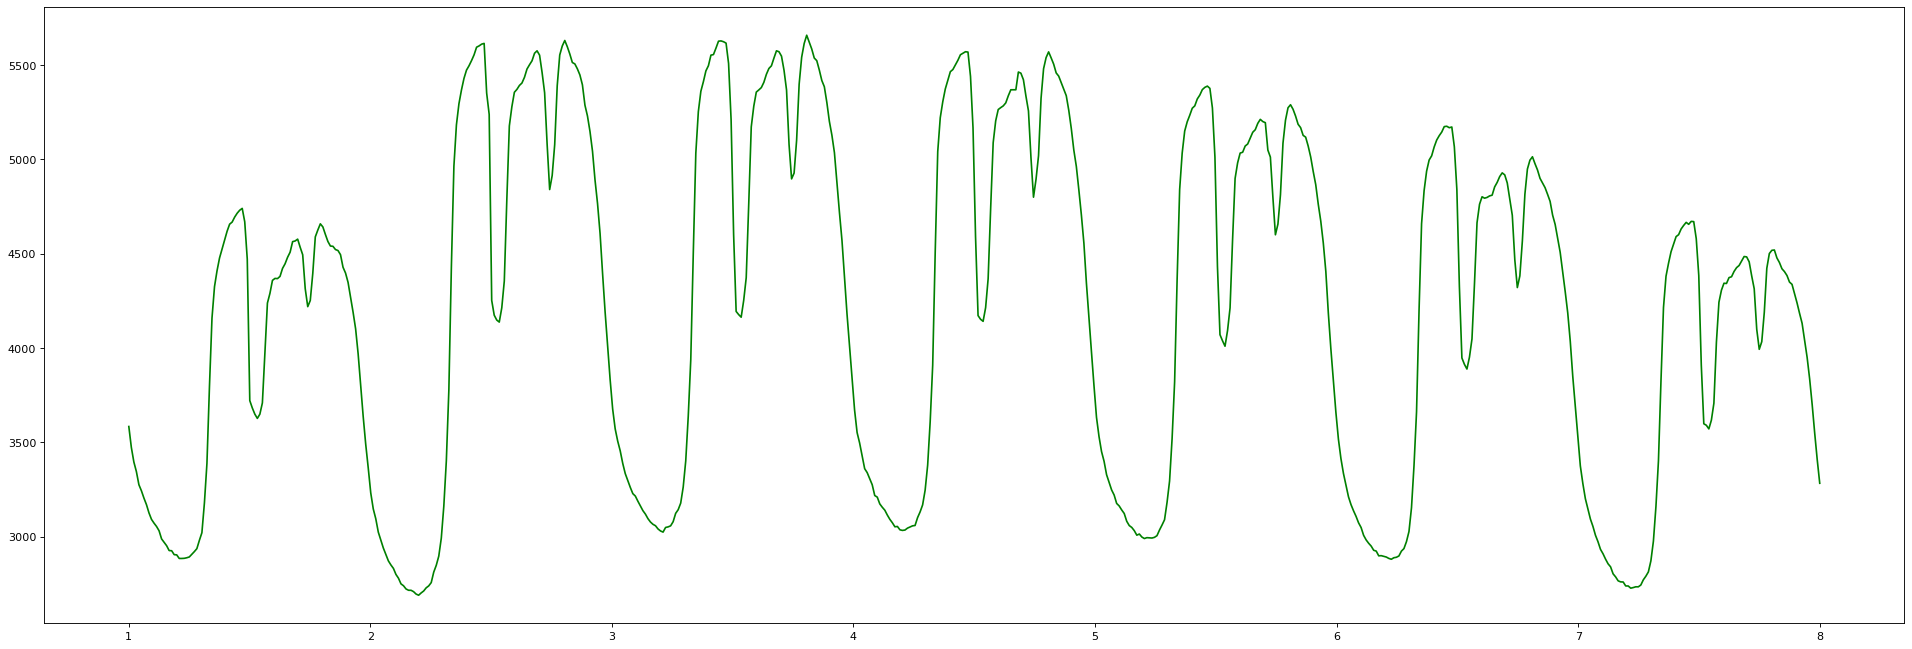

In [15]:
#  2021年1-11到1-17电力负荷的分布（周一到周日）
plt.figure(figsize=(30, 10), dpi=80)

X = np.linspace(1, 8, 672, endpoint=True)
C = np.array(data['value'][960: 1632])
plt.plot(X, C, color='green')
plt.show()

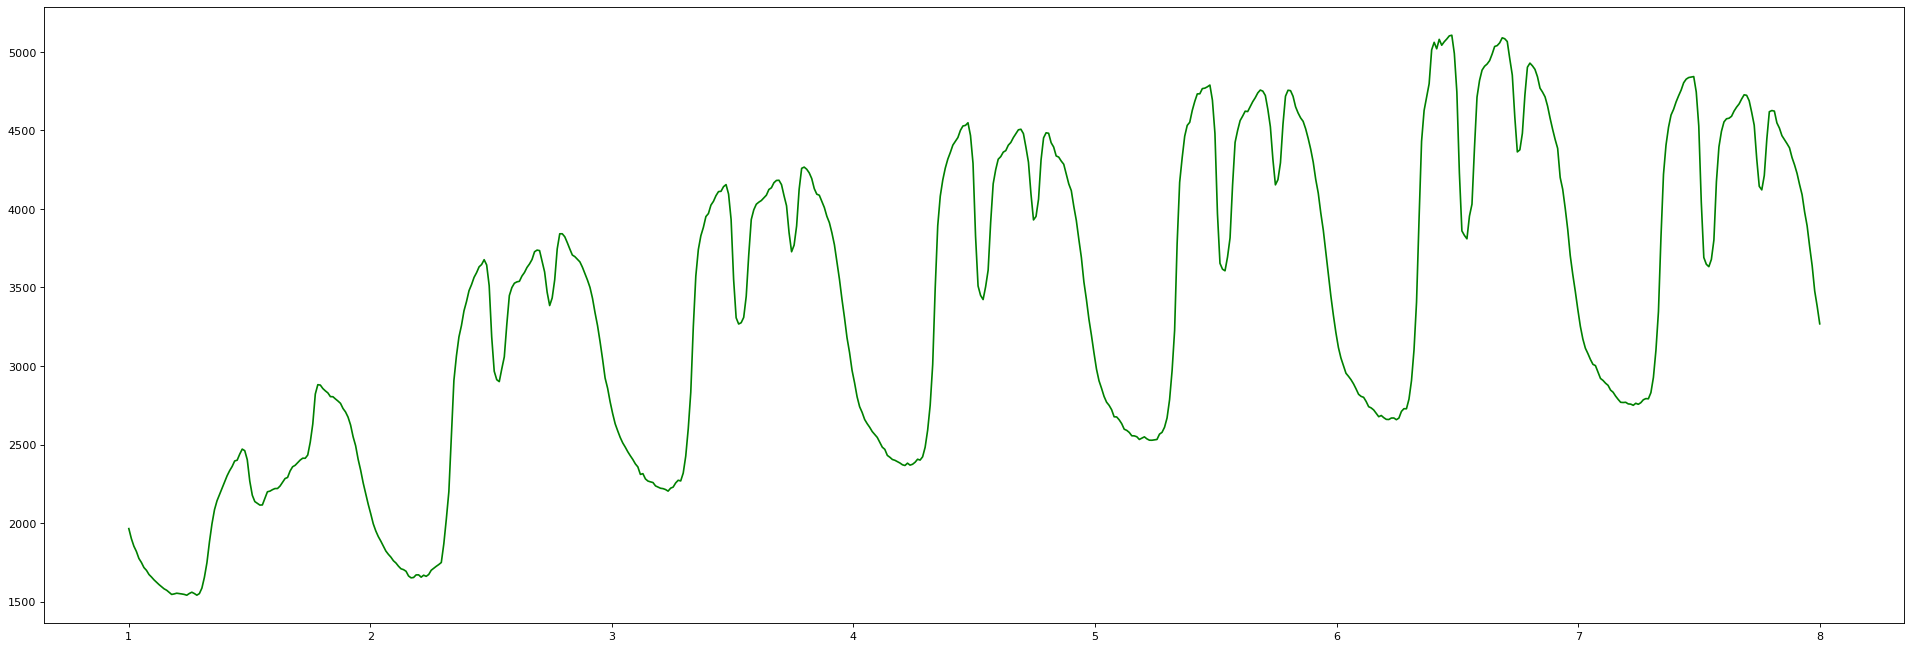

In [16]:
#  2021年2-1到2-7电力负荷的分布（周一到周日）
plt.figure(figsize=(30, 10), dpi=80)

X = np.linspace(1, 8, 672, endpoint=True)
C = np.array(data['value'][2976: 2976+672])
plt.plot(X, C, color='green')
plt.show()

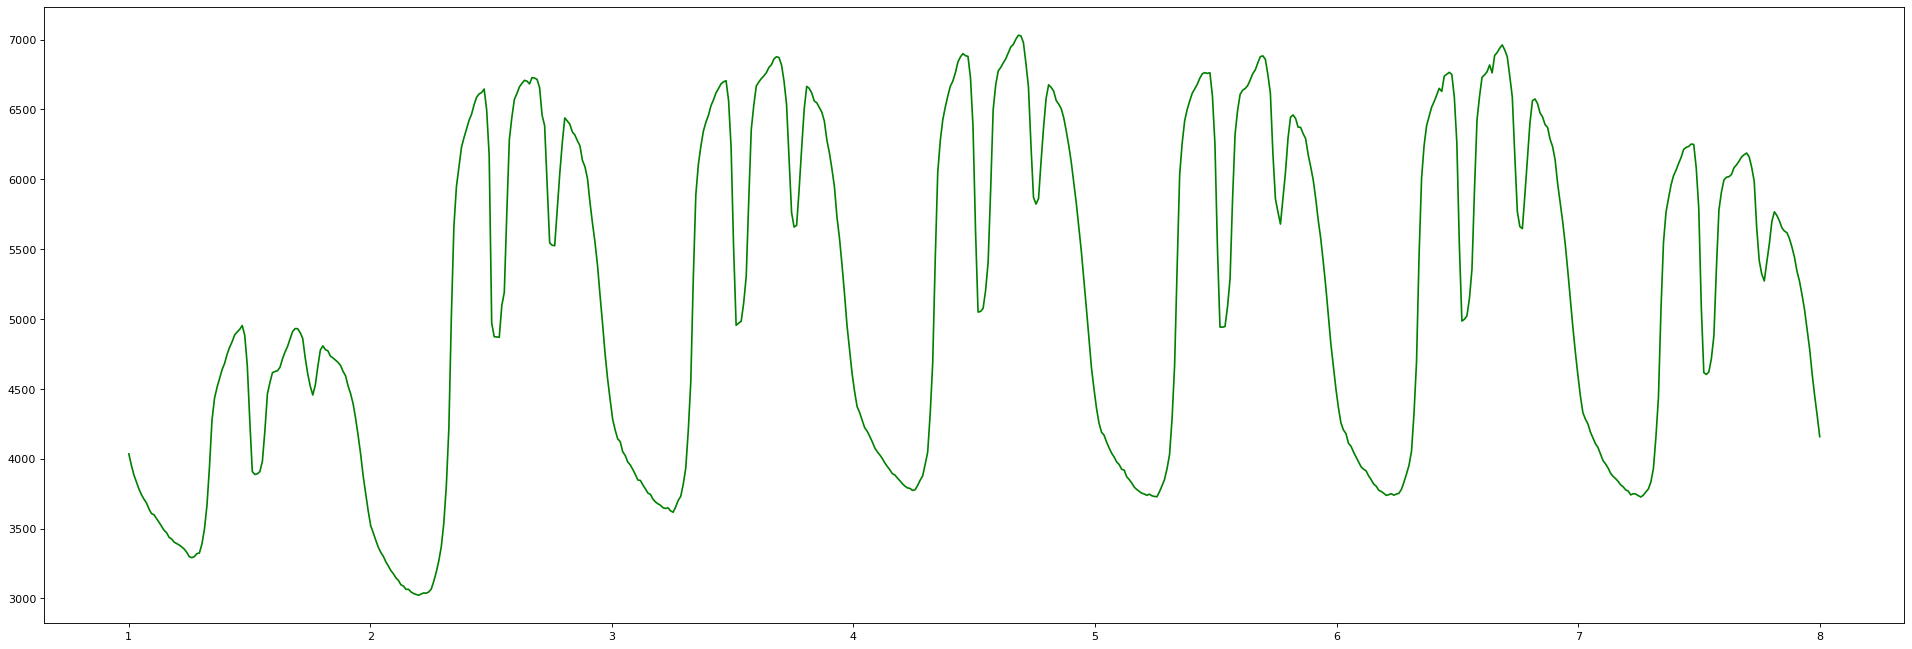

In [17]:
#  2021年4-12到4-18电力负荷的分布（周一到周日）
plt.figure(figsize=(30, 10), dpi=80)

X = np.linspace(1, 8, 672, endpoint=True)
C = np.array(data['value'][9696: 9696+672])
plt.plot(X, C, color='green')
plt.show()

每个星期负荷的变化规律类似，周日和周一会相对低一些。

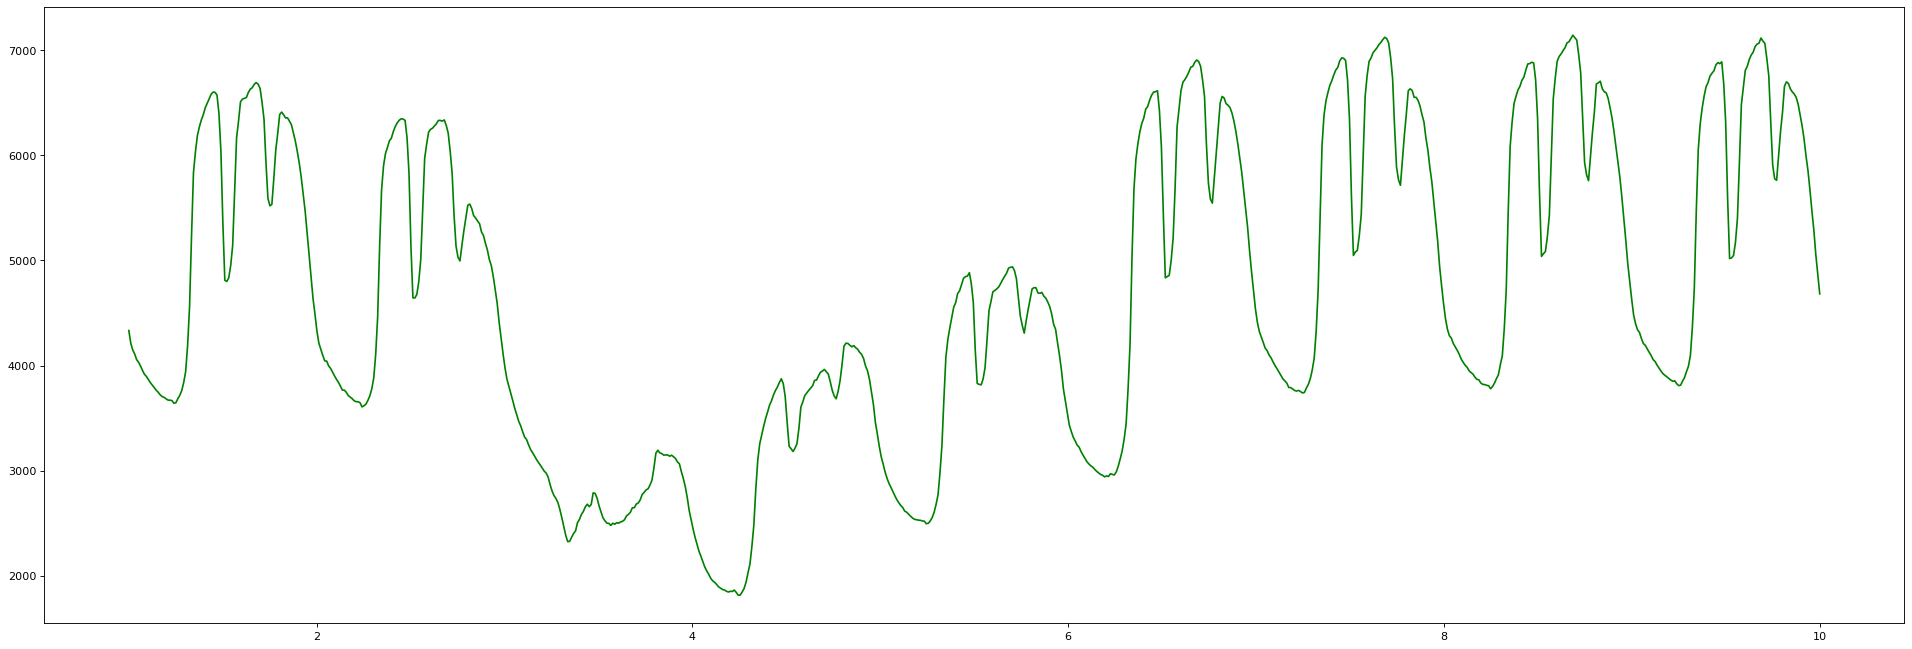

In [18]:
#  2021-4-29到 2021-5-7
plt.figure(figsize=(30, 10), dpi=80)

X = np.linspace(1, 10, 864, endpoint=True)
C = np.array(data['value'][11328: 12192])
plt.plot(X, C, color='green')
plt.show()

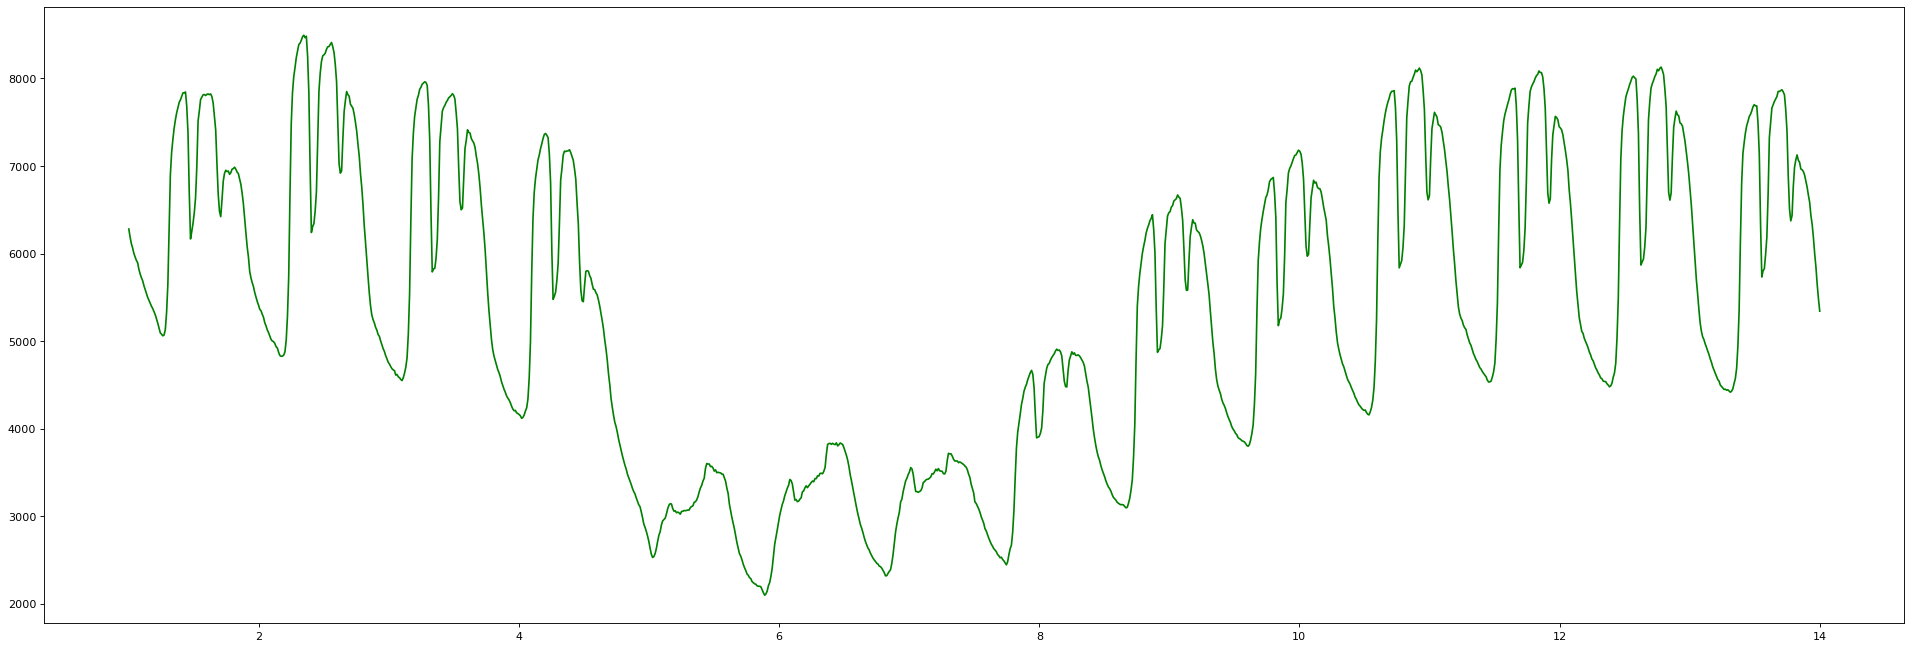

In [19]:
#  2021-9-27到 2021-10-9
plt.figure(figsize=(30, 10), dpi=80)

X = np.linspace(1, 14, 672*2, endpoint=True)
C = np.array(data['value'][25824: 27168])
plt.plot(X, C, color='green')
plt.show()

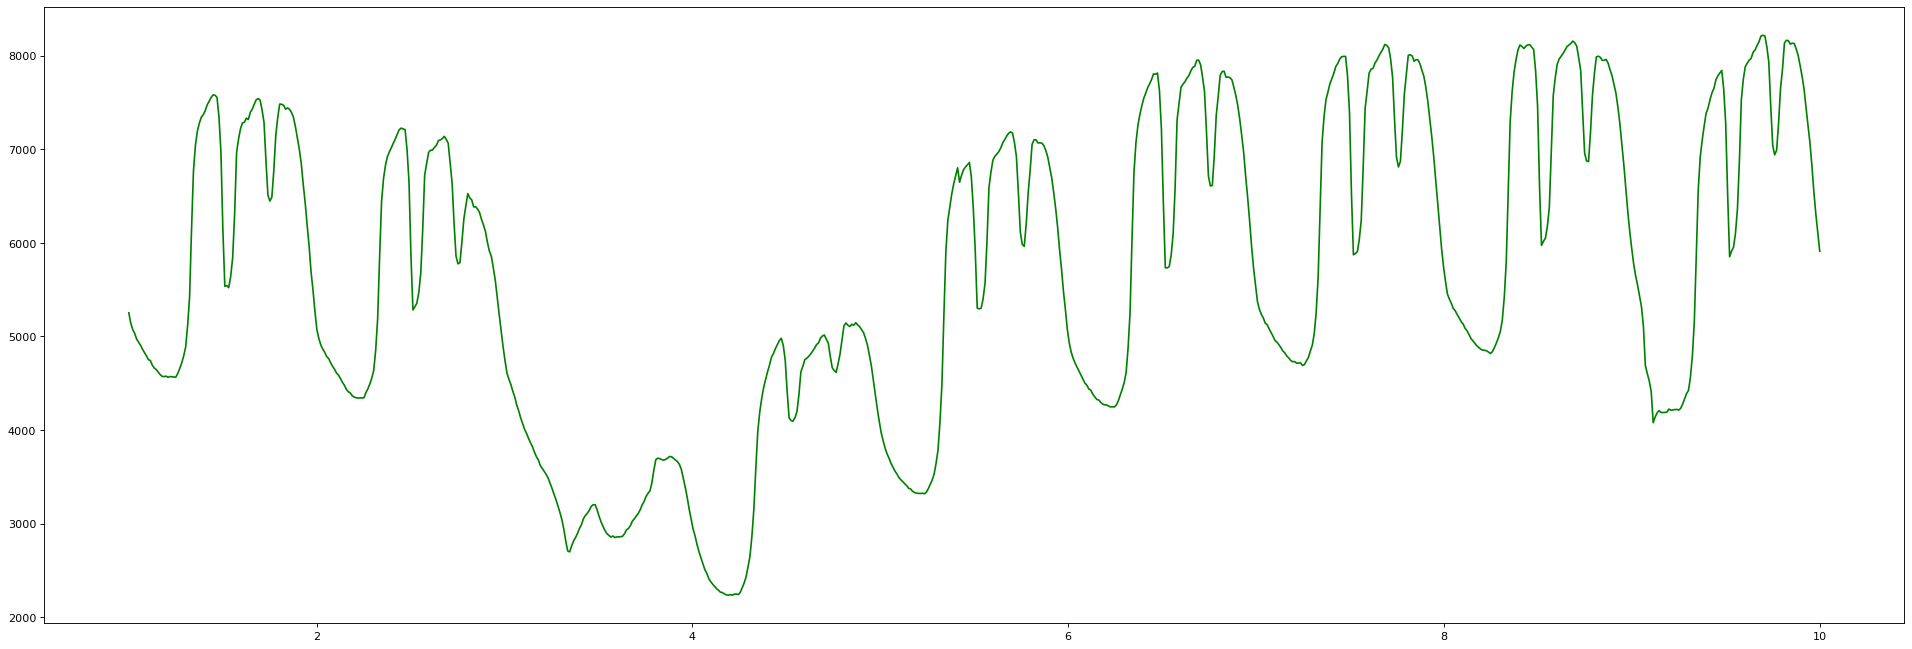

In [20]:
#  2022-4-29到 2022-5-7
plt.figure(figsize=(30, 10), dpi=80)

X = np.linspace(1, 10, 864, endpoint=True)
C = np.array(data['value'][46368: 46368+864])
plt.plot(X, C, color='green')
plt.show()

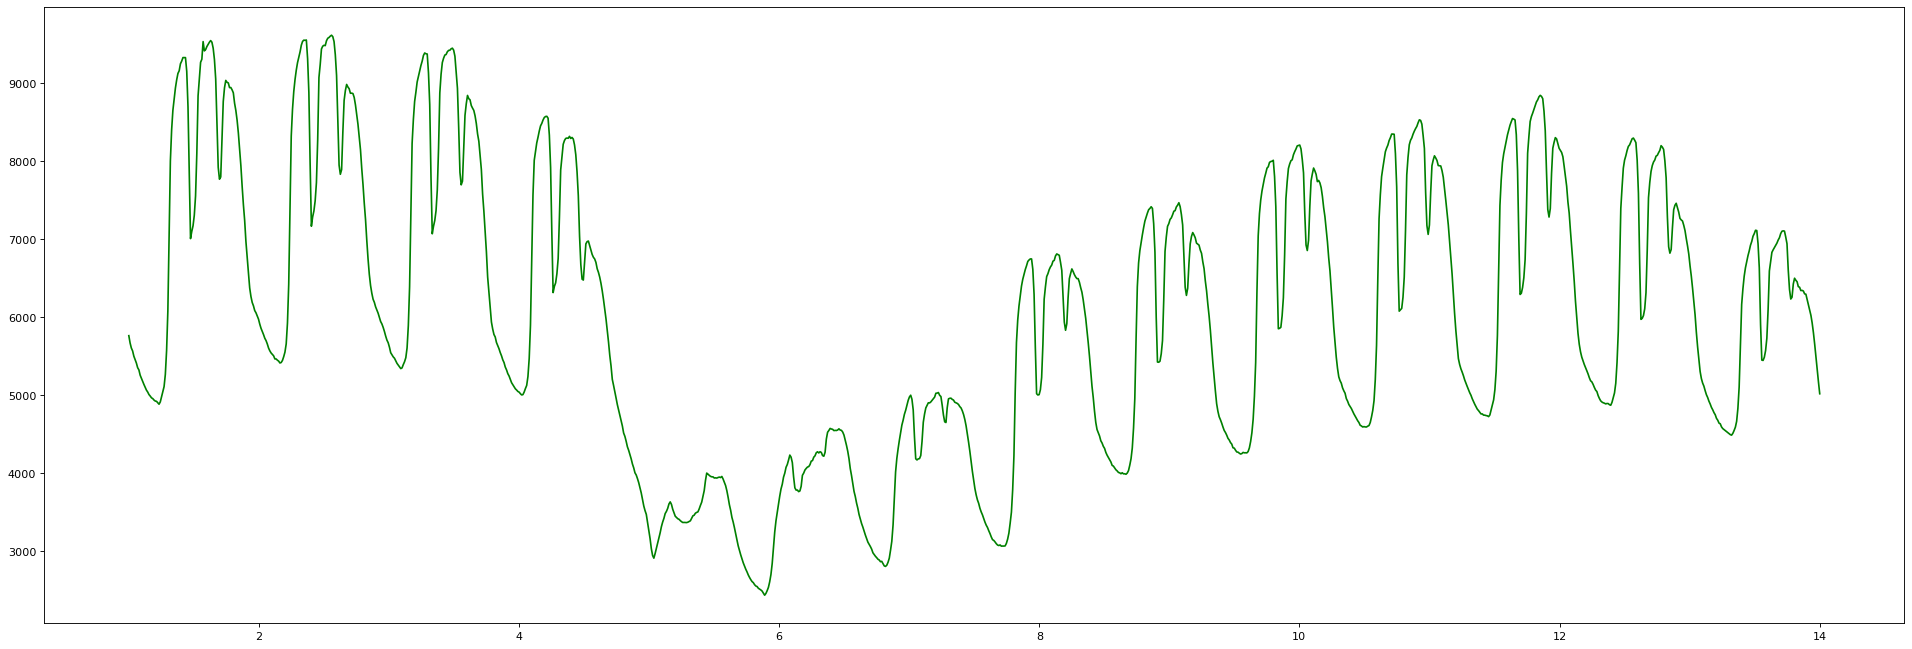

In [21]:
#  2022-9-27到 2022-10-9
plt.figure(figsize=(30, 10), dpi=80)

X = np.linspace(1, 14, 672*2, endpoint=True)
C = np.array(data['value'][60864: 60864+672*2])
plt.plot(X, C, color='green')
plt.show()

在假期时电力负荷先下降后上升

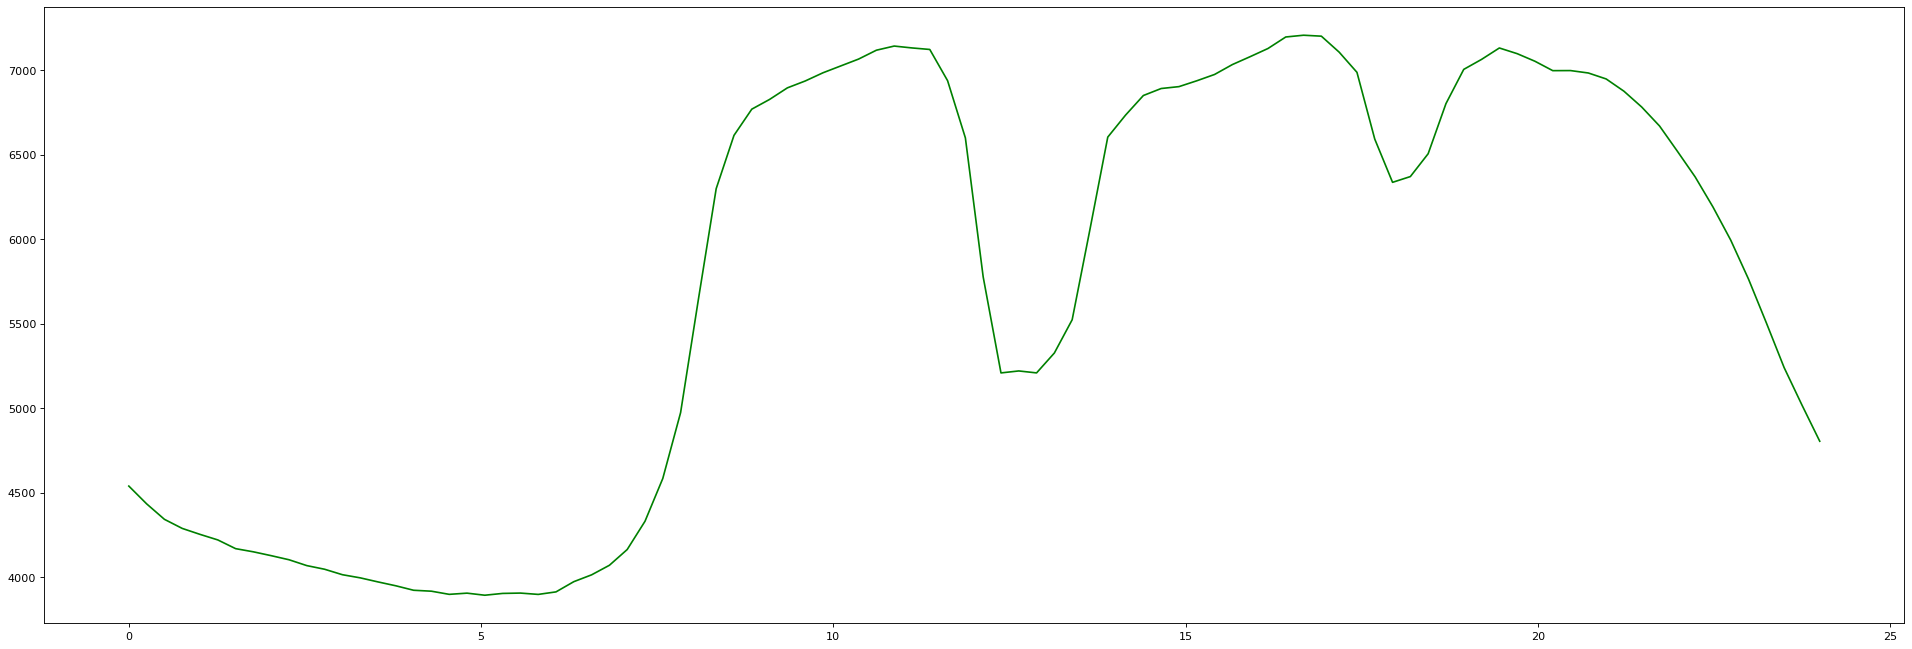

In [22]:
# 2022-1-6一天负荷的变化
plt.figure(figsize=(30, 10), dpi=80)

X = np.linspace(0, 24, 96, endpoint=True)
C = np.array(data['value'][35520: 35520+96])
plt.plot(X, C, color='green')
plt.show()

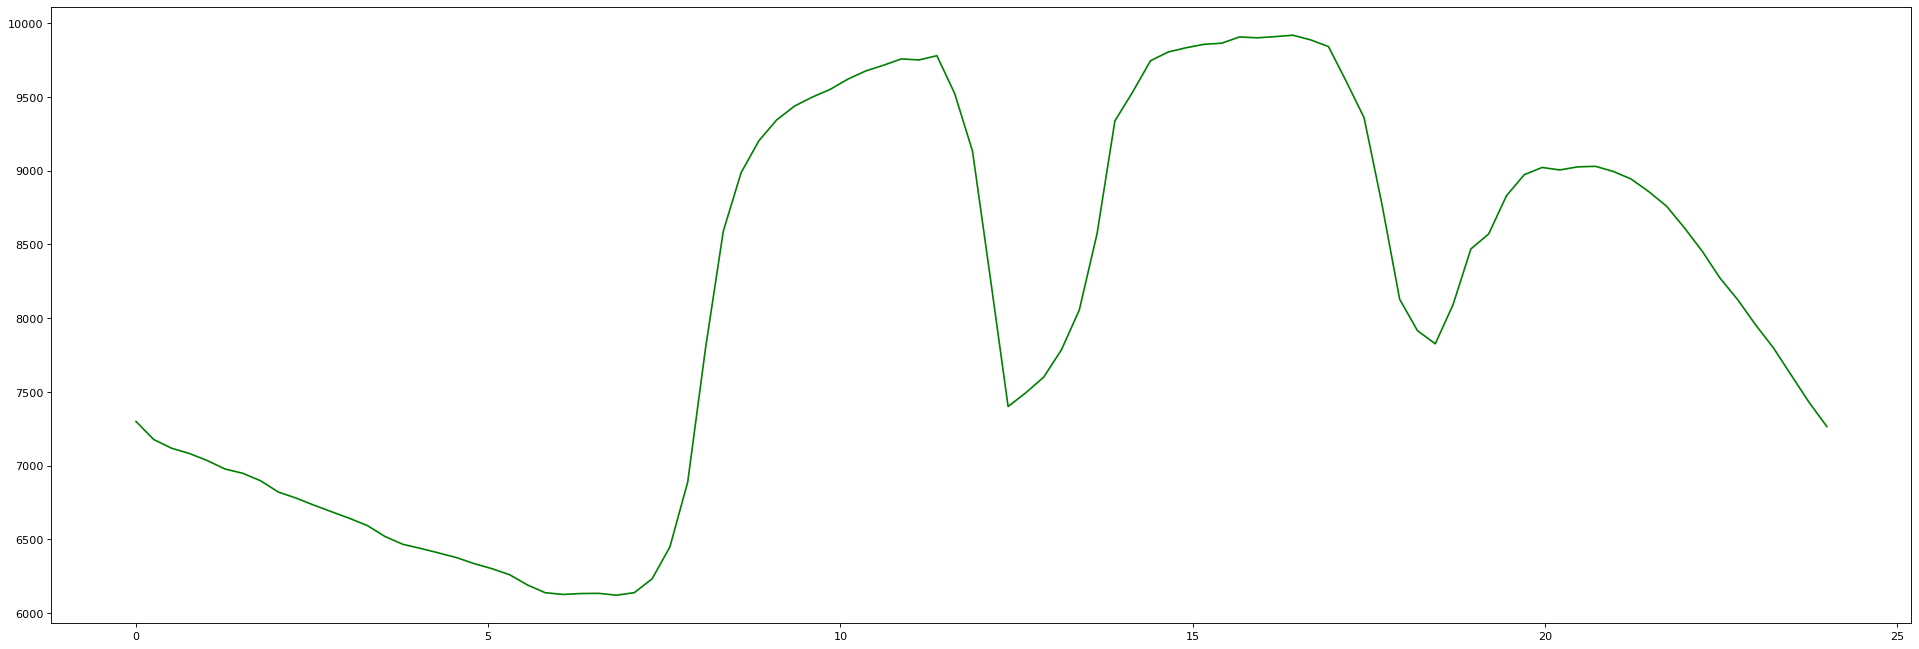

In [23]:
# 2022-7-9一天负荷的变化
plt.figure(figsize=(30, 10), dpi=80)

X = np.linspace(0, 24, 96, endpoint=True)
C = np.array(data['value'][53184: 53184+96])
plt.plot(X, C, color='green')
plt.show()

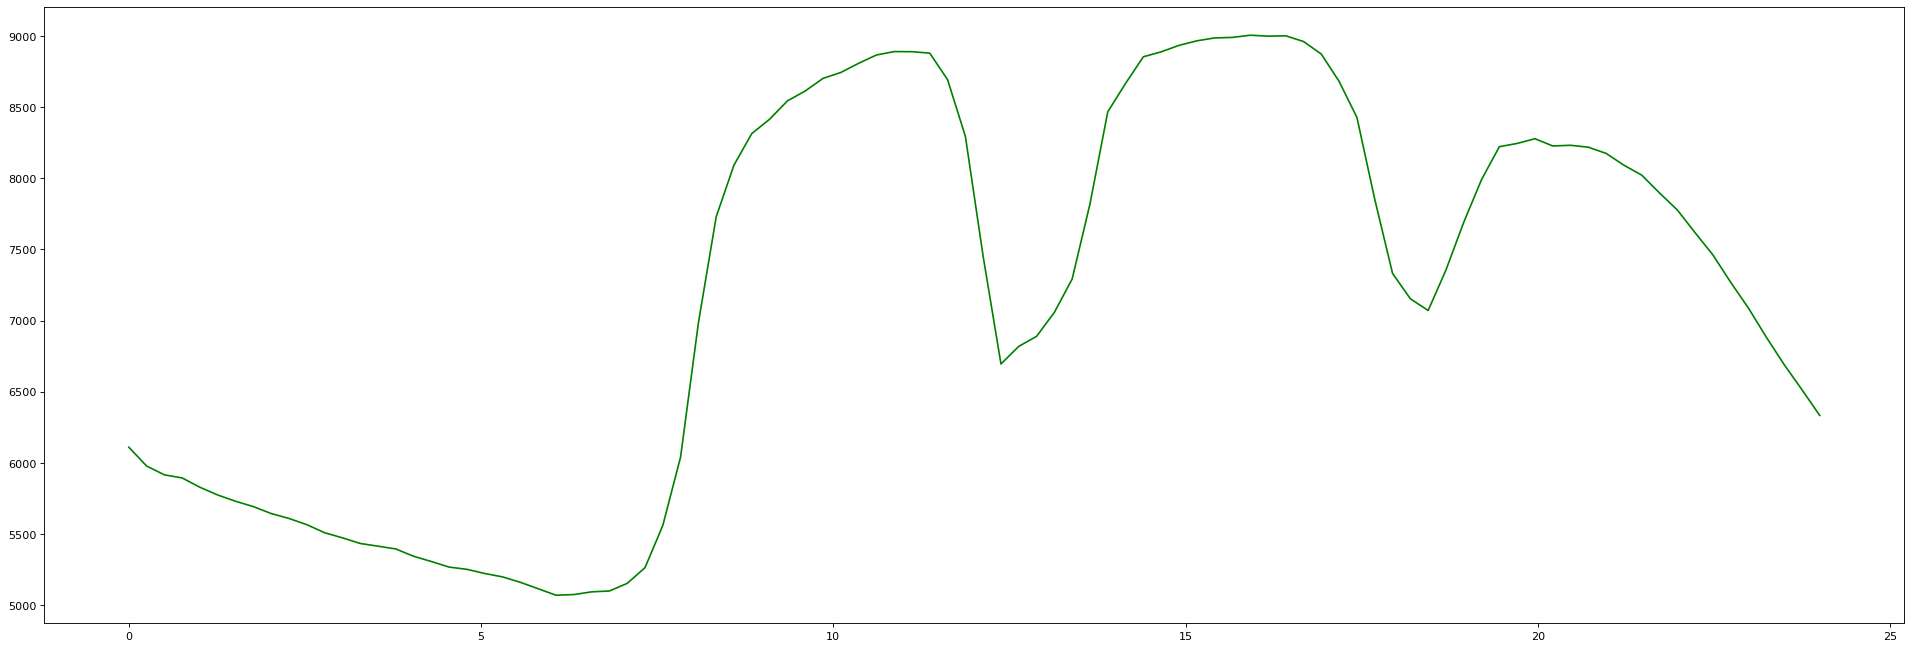

In [24]:
# 2021-9-3一天负荷的变化
plt.figure(figsize=(30, 10), dpi=80)

X = np.linspace(0, 24, 96, endpoint=True)
C = np.array(data['value'][23520: 23520+96])
plt.plot(X, C, color='green')
plt.show()

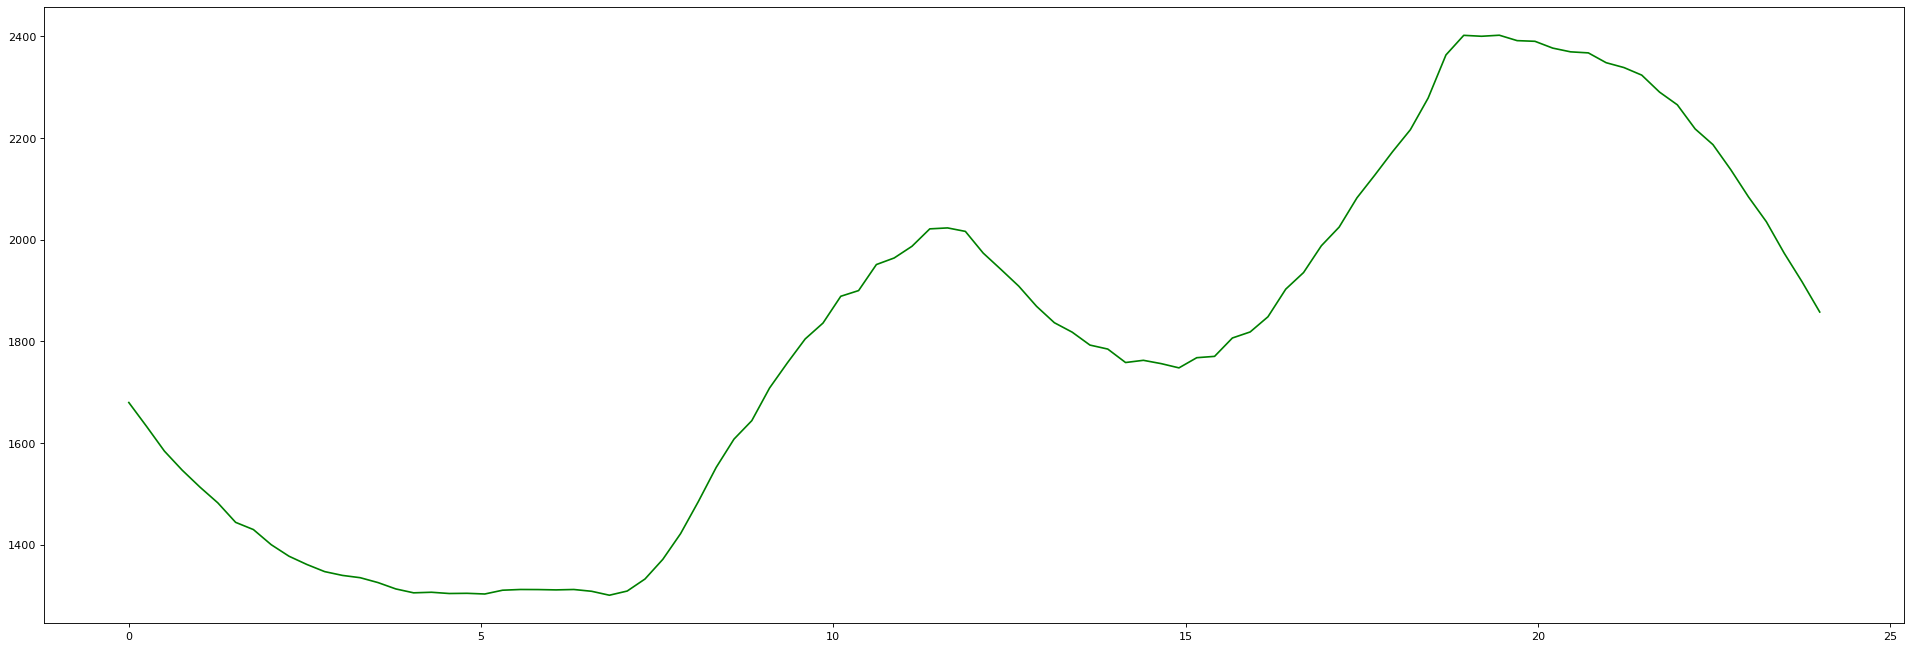

In [25]:
# 2022-2-15一天负荷的变化
plt.figure(figsize=(30, 10), dpi=80)

X = np.linspace(0, 24, 96, endpoint=True)
C = np.array(data['value'][39360: 39360+96])
plt.plot(X, C, color='green')
plt.show()

负荷每天的变化呈现一定的周期性

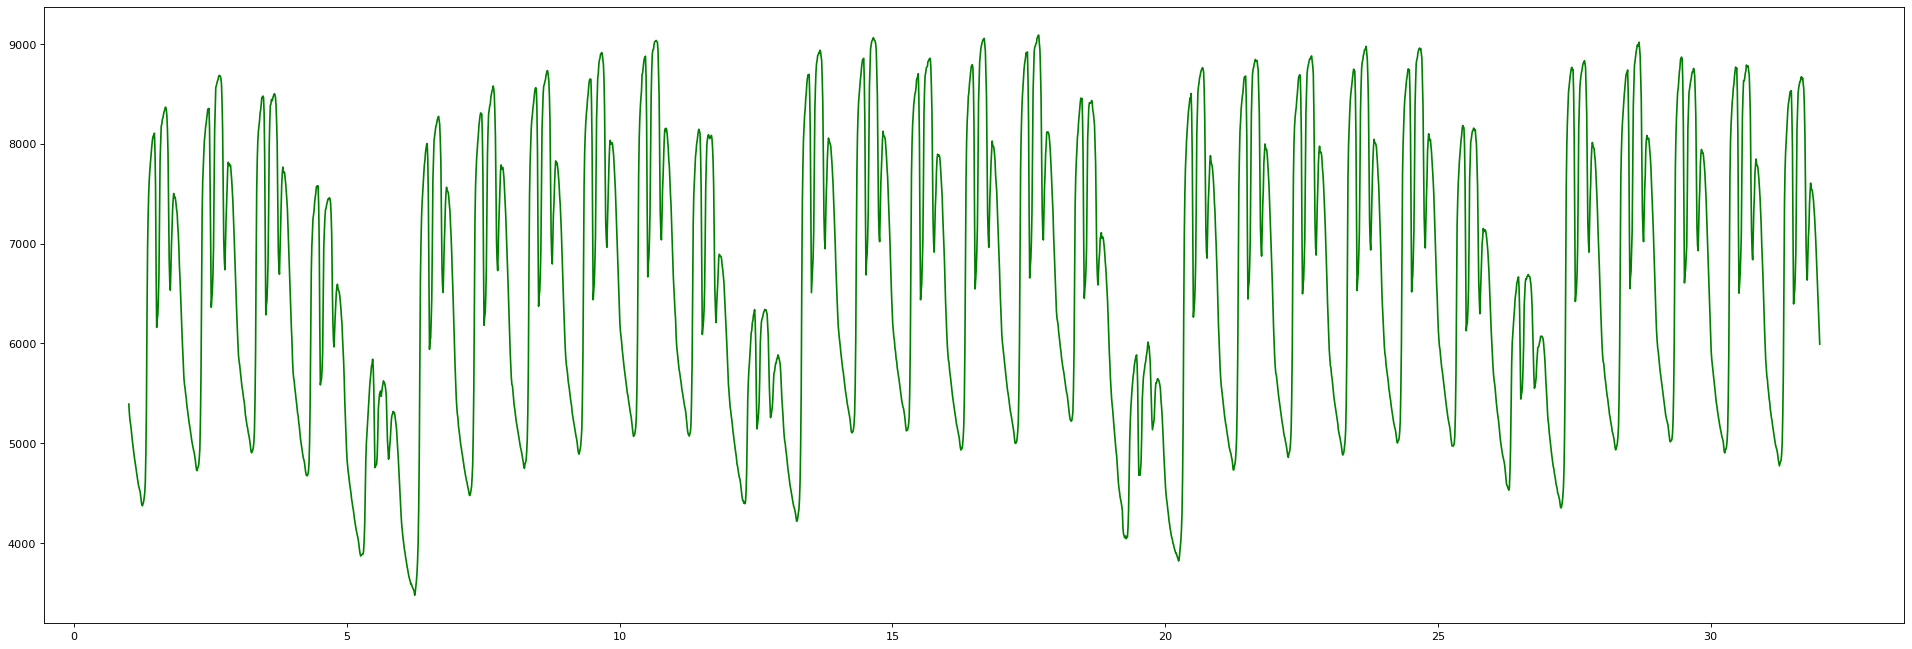

In [26]:
# 2021年7月负荷的变化
plt.figure(figsize=(30, 10), dpi=80)

X = np.linspace(1, 32, 96*31, endpoint=True)
C = np.array(data['value'][17376: 17376+96*31])
plt.plot(X, C, color='green')
plt.show()

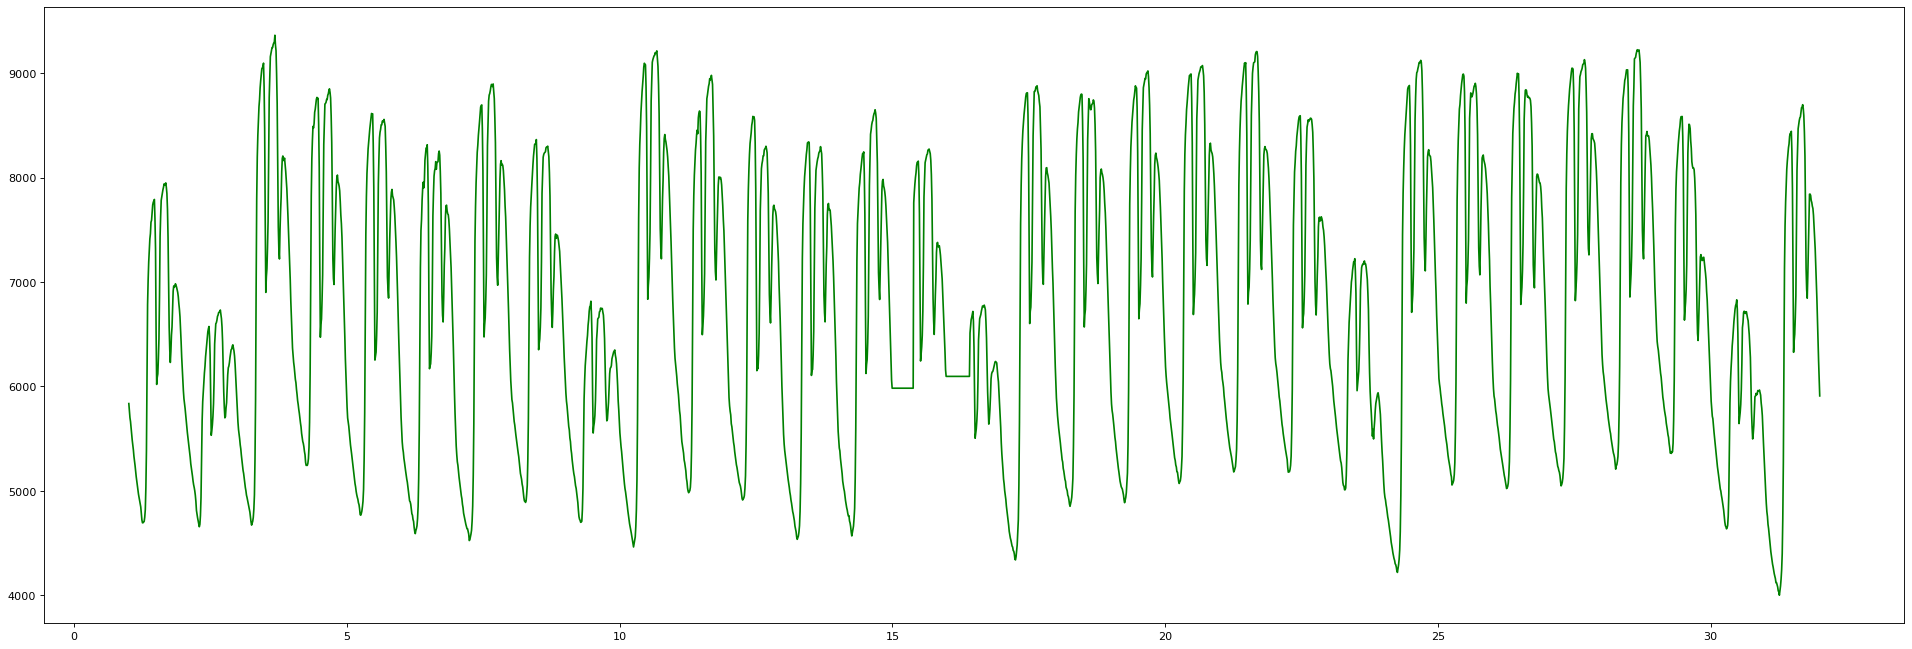

In [27]:
# 2021年8月负荷的变化
plt.figure(figsize=(30, 10), dpi=80)

X = np.linspace(1, 32, 96*31, endpoint=True)
C = np.array(data['value'][17376+96*31: 17376+96*31*2])
plt.plot(X, C, color='green')
plt.show()

月份的第几天和负荷没啥关系